In [24]:
import re
import pandas as pd
from flask import Flask, jsonify
from flask import request
from flasgger import Swagger, LazyString, LazyJSONEncoder
from flasgger import swag_from

In [1]:
#Data Analytics

In [30]:
import pandas as pd
import re

In [31]:
dataset = pd.read_csv('re_dataset.csv', encoding='latin-1')
abusive = pd.read_csv('abusive.csv', encoding='latin-1')
abusive = abusive['ABUSIVE'].tolist()

#Analysis for knowing the frequency of occurence abusive in file

In [32]:
occurance = []
for i in range(len(dataset['Tweet'])):
    dat = dataset['Tweet'][i].split()
    for j in range(len(abusive)):
        if dat.count(abusive[j]) == 1:
            occurance.append(dat.count(abusive[j]))

In [33]:
len(occurance)

4165

In [37]:
abusive_occurance = []
for i in range(len(dataset)):
    dataset['Tweet'][i].split()
    for j in range(len(dataset['Tweet'][i].split())):
        #print(j)
        for k in range(len(abusive)):
            #print(dataset['Tweet'][0].split()[0])
            if dataset['Tweet'][i].split()[j] == abusive[k]:
                abusive_occurance.append(abusive[k])

In [38]:
len(abusive_occurance)

4635

In [39]:
from collections import Counter

In [40]:
Data = Counter(abusive_occurance)

In [41]:
type(Data.items())

dict_items

In [42]:
abusive_data = pd.DataFrame.from_dict(Data.items())

In [43]:
abusive_data.columns = ['Abusive', 'Count']

In [45]:
abusive_data

,Abusive,Count
0,bego,66
1,sarap,30
2,cebong,255
3,dongok,7
4,bani,117
...,...,...
109,koreng,4
110,serbet,1
111,porno,1
112,bandot,1


In [ ]:
#Plotting the frequency of abusive word in the file

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
sns.set_style('darkgrid')

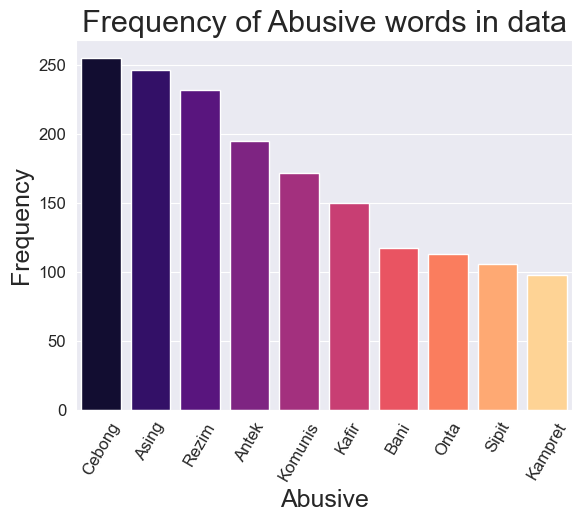

In [48]:
sns.barplot(x='Abusive',y='Count', data=abusive_data.nlargest(10, 'Count'), color='lightblue', capsize = 0.5,             
            saturation = 8, edgecolor = 'w', palette = 'magma')
plt.title('Frequency of Abusive words in data', fontsize=22)
xbars = ('Cebong','Asing','Rezim','Antek','Komunis', 'Kafir', 'Bani', 'Onta', 'Sipit', 'Kampret')
plt.xticks(range(0,len(xbars)), xbars, rotation = 60, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Abusive", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)
plt.show()

In [49]:
import sqlite3
from wordcloud import WordCloud
conn = sqlite3.connect('main.db')

In [52]:
all_data = pd.read_csv('Clean_dataset.csv')

In [53]:
all_data['HS'].sum()

5424

In [54]:
all_data['Abusive'].sum()

4907

In [55]:
all_data.duplicated().sum()

0

In [56]:
all_data.drop_duplicates()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,Disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0
1,Siapa yang telat ngasih tau eluedan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0
2,Kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0
3,Aku itu akuku tau matamu sipit tapi diliat dar...,0,0,0,0,0,0,0,0,0,0,0,0
4,Kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,Jangan asal ngomong ndasmu congor lu yg sekate...,1,1,1,0,0,0,1,0,0,1,0,0
12855,Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
12856,Hati hati bisu glagi bosan huft,0,0,0,0,0,0,0,0,0,0,0,0
12857,Bom yang real mudah terdeteksi bom yang terkub...,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
new_data = all_data.dropna()

In [58]:
new_data.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [59]:
new_data['Total_char'] = new_data.Tweet.apply(len)

/var/folders/b7/6fnfw47d4q72lh9j2qm4d7f00000gn/T/ipykernel_2055/2909087137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Total_char'] = new_data.Tweet.apply(len)


In [60]:
new_data['Total_word'] = new_data.Tweet.apply(lambda sent : len(sent.split()))

/var/folders/b7/6fnfw47d4q72lh9j2qm4d7f00000gn/T/ipykernel_2055/1317767420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Total_word'] = new_data.Tweet.apply(lambda sent : len(sent.split()))


In [61]:
new_data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_char,Total_word
0,Disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,127,21
1,Siapa yang telat ngasih tau eluedan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0,104,18
2,Kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0,244,36
3,Aku itu akuku tau matamu sipit tapi diliat dar...,0,0,0,0,0,0,0,0,0,0,0,0,60,12
4,Kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,78,12


In [62]:
new_data['HS_Strong'].sum()

467

In [63]:
pd.read_csv('HS.csv')

,Speech,Count
0,Hate speech,5424
1,Abusive,4907
2,Hate speech individual,3478
3,Hate speech group,1946
4,Hate speech religion,774
5,Hate speech race,553
6,Hate speech physical,315
7,Hate speech gender,298
8,Hate speech other,3646


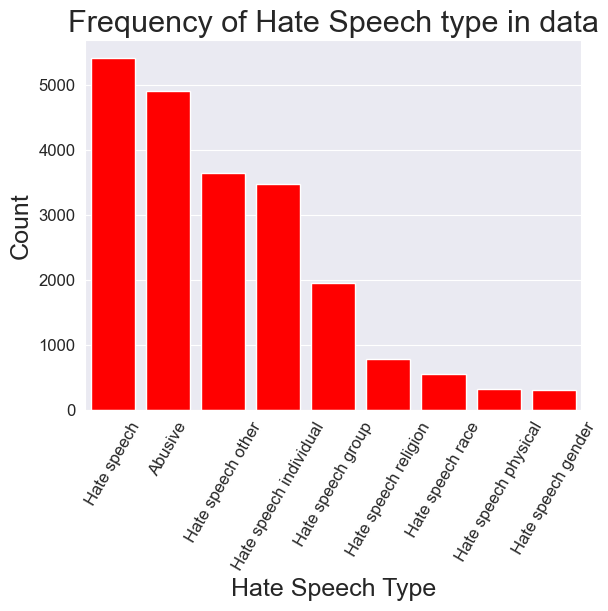

In [64]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.barplot(x='Speech',y='Count', data=pd.read_csv('HS.csv').nlargest(10, 'Count'), color='red', capsize = 0.5,             
            saturation = 8, edgecolor = 'w')
plt.title('Frequency of Hate Speech type in data', fontsize=22)
plt.xticks(rotation = 60, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Hate Speech Type", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.show()

### 

In [65]:
new_data['HS_Weak'].sum()

3288

In [66]:
new_data.corr()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_char,Total_word
HS,1.000000,0.364064,0.712877,0.494391,0.296290,0.248184,0.185527,0.180329,0.736517,0.686217,0.452151,0.227278,-0.157285,-0.148790
Abusive,0.364064,1.000000,0.285328,0.148018,0.069072,-0.030020,0.196546,0.187560,0.261275,0.309064,0.188188,-0.097744,-0.254649,-0.209445
HS_Individual,0.712877,0.285328,1.000000,-0.257148,0.031386,-0.000503,0.212684,0.183143,0.638119,0.962602,-0.235178,0.059593,-0.152066,-0.136658
HS_Group,0.494391,0.148018,-0.257148,1.000000,0.369383,0.342619,-0.007965,0.021488,0.223975,-0.247531,0.914562,0.239322,-0.028254,-0.035646
HS_Religion,0.296290,0.069072,0.031386,0.369383,1.000000,0.094628,-0.004149,0.026212,-0.159220,0.030786,0.348821,0.083698,0.010501,0.008721
HS_Race,0.248184,-0.030020,-0.000503,0.342619,0.094628,1.000000,-0.028636,-0.019915,-0.133368,-0.007391,0.236361,0.247765,-0.047069,-0.046367
HS_Physical,0.185527,0.196546,0.212684,-0.007965,-0.004149,-0.028636,1.000000,0.052493,-0.099698,0.219622,0.001665,-0.025387,-0.054470,-0.041597
HS_Gender,0.180329,0.187560,0.183143,0.021488,0.026212,-0.019915,0.052493,1.000000,-0.096905,0.190513,0.028174,-0.018852,-0.036664,-0.023266
HS_Other,0.736517,0.261275,0.638119,0.223975,-0.159220,-0.133368,-0.099698,-0.096905,1.000000,0.606985,0.225254,0.124123,-0.123843,-0.121860
HS_Weak,0.686217,0.309064,0.962602,-0.247531,0.030786,-0.007391,0.219622,0.190513,0.606985,1.000000,-0.226382,-0.113793,-0.146762,-0.128177


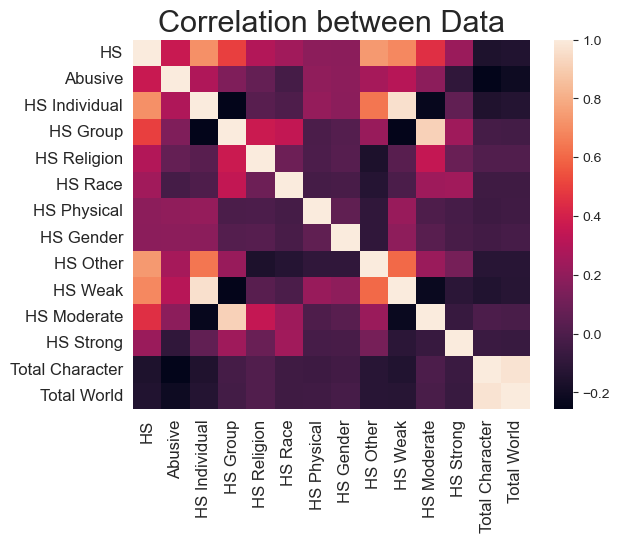

In [67]:
sns.heatmap(new_data.corr(), xticklabels=['HS','Abusive','HS Individual','HS Group','HS Religion','HS Race', 'HS Physical', 'HS Gender', 'HS Other', 'HS Weak', 'HS Moderate', 'HS Strong', 'Total Character', 'Total World'], yticklabels=['HS','Abusive','HS Individual','HS Group','HS Religion','HS Race', 'HS Physical', 'HS Gender', 'HS Other', 'HS Weak', 'HS Moderate', 'HS Strong', 'Total Character', 'Total World'])
plt.title('Correlation between Data', fontsize=22)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

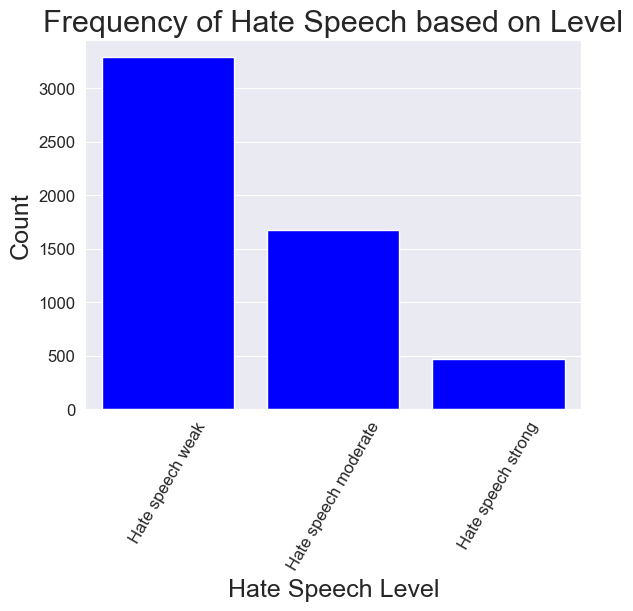

In [68]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.barplot(x='Speech',y='Count', data=pd.read_csv('HS_type.csv').nlargest(10, 'Count'), color='blue', capsize = 0.5,             
            saturation = 8, edgecolor = 'w')
plt.title('Frequency of Hate Speech based on Level', fontsize=22)
plt.xticks(rotation = 60, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Hate Speech Level", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.show()

In [69]:
HS_type = pd.read_csv('HS_type.csv')
HS_type

,Speech,Count
0,Hate speech weak,3288
1,Hate speech moderate,1669
2,Hate speech strong,467


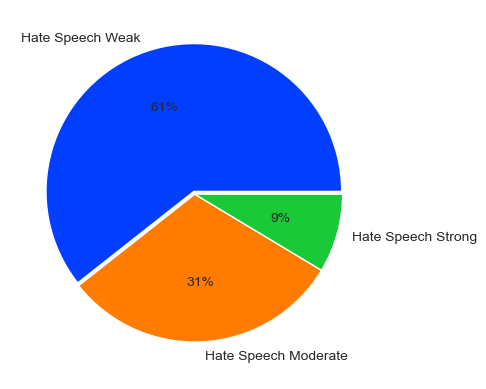

In [70]:
colors = sns.color_palette('bright')
label = ['Hate Speech Weak','Hate Speech Moderate', 'Hate Speech Strong']
datas = [3288, 1669,467]
explode = [0.02, 0, 0]
plt.pie(datas, labels=label, colors=colors,
        autopct='%.0f%%', shadow=False, rotatelabels=0, explode=explode)
plt.show()

In [71]:
new_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_char,Total_word
0,Disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,127,21
1,Siapa yang telat ngasih tau eluedan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0,104,18
2,Kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0,244,36
3,Aku itu akuku tau matamu sipit tapi diliat dar...,0,0,0,0,0,0,0,0,0,0,0,0,60,12
4,Kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,78,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,Jangan asal ngomong ndasmu congor lu yg sekate...,1,1,1,0,0,0,1,0,0,1,0,0,54,9
12855,Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,22,4
12856,Hati hati bisu glagi bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,32,6
12857,Bom yang real mudah terdeteksi bom yang terkub...,0,0,0,0,0,0,0,0,0,0,0,0,114,18


In [72]:
new_data.describe().applymap('{:,.2f}'.format)

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_char,Total_word
count,"12,858.00","12,858.00","12,858.00","12,858.00","12,858.00","12,858.00","12,858.00","12,858.00","12,858.00","12,858.00","12,858.00","12,858.00","12,858.00","12,858.00"
mean,0.42,0.38,0.27,0.15,0.06,0.04,0.02,0.02,0.28,0.26,0.13,0.04,99.39,15.62
std,0.49,0.49,0.44,0.36,0.24,0.20,0.15,0.15,0.45,0.44,0.34,0.19,65.29,10.07
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.00,8.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86.00,13.00
75%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,134.00,21.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,276.00,52.00


In [73]:
new_data.skew().apply('{:,.2f}'.format).to_csv('Skew.csv')

/var/folders/b7/6fnfw47d4q72lh9j2qm4d7f00000gn/T/ipykernel_2055/3327477920.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data.skew().apply('{:,.2f}'.format).to_csv('Skew.csv')


In [74]:
new_data.kurtosis().apply('{:,.2f}'.format).to_csv('Kurtosis.csv')

/var/folders/b7/6fnfw47d4q72lh9j2qm4d7f00000gn/T/ipykernel_2055/3568058606.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data.kurtosis().apply('{:,.2f}'.format).to_csv('Kurtosis.csv')


In [75]:
skew = pd.read_csv('Skew.csv')

In [76]:
kurtosis = pd.read_csv('Kurtosis.csv')

In [77]:
skew.columns = ['Type', 'Skewness']

In [78]:
kurtosis.columns = ['Type', 'Kurtosis']

In [79]:
skew['Kurtosis'] = kurtosis['Kurtosis']

In [81]:
skew

,Type,Skewness,Kurtosis
0,HS,0.32,-1.90
1,Abusive,0.49,-1.76
2,HS_Individual,1.03,-0.93
3,HS_Group,1.95,1.79
4,HS_Religion,3.70,11.68
5,HS_Race,4.51,18.30
6,HS_Physical,6.15,35.86
7,HS_Gender,6.34,38.19
8,HS_Other,0.96,-1.08
9,HS_Weak,1.12,-0.75


In [82]:
from wordcloud import WordCloud

In [83]:
all_text = ' '.join(new_data['Tweet'])
wordcloud = WordCloud().generate(all_text)

<function matplotlib.pyplot.show(close=None, block=None)>

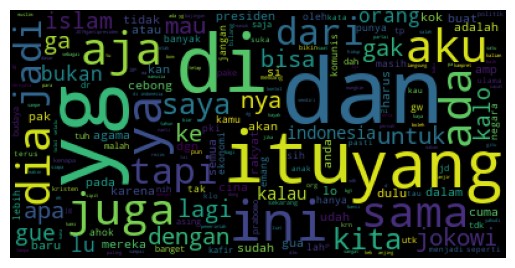

In [84]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [85]:
df_HS = new_data.loc[new_data['HS'] == 1]
text = ' '.join(df_HS['Tweet'])
wordcloud = WordCloud().generate(text)

<function matplotlib.pyplot.show(close=None, block=None)>

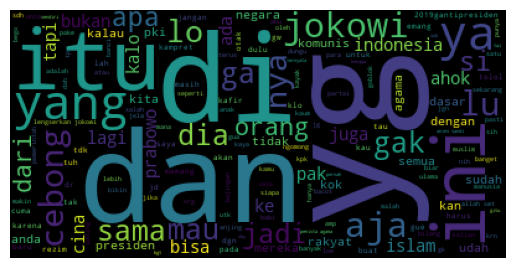

In [86]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [87]:
df_Abusive = new_data.loc[new_data['Abusive'] == 1]
text = ' '.join(df_Abusive['Tweet'])
wordcloud = WordCloud().generate(text)

<function matplotlib.pyplot.show(close=None, block=None)>

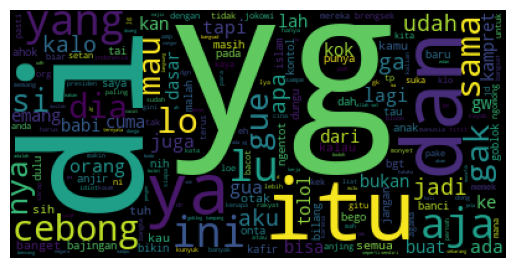

In [88]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show

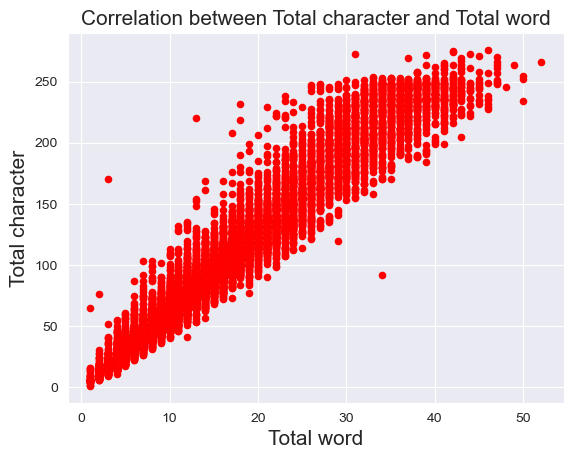

In [89]:
new_data.plot(x='Total_word', y='Total_char', kind = 'scatter', color='red')
plt.ylabel('Total character', fontsize=15)
plt.xlabel('Total word', fontsize=15)
plt.title('Correlation between Total character and Total word', fontsize=15)
plt.show()

In [90]:
new_data['Tweet'][0]

'Disaat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego'

In [91]:
abusive = pd.read_csv('Abusive.csv')

In [92]:
abusive = abusive['ABUSIVE'].to_list()

In [88]:
# total = 0
# for i in range(len(new_data['Tweet'])):
#     print(new_data['Tweet'][182])
# new_data       

In [93]:
new_df = new_data.dropna(how='any')

In [94]:
new_df['Tweet'][:183]

0      Disaat semua cowok berusaha melacak perhatian ...
1      Siapa yang telat ngasih tau eluedan sarap gue ...
2      Kadang aku berfikir kenapa aku tetap percaya p...
3      Aku itu akuku tau matamu sipit tapi diliat dar...
4      Kaum cebong kapir udah keliatan dongoknya dari...
                             ...                        
178                                        Iya tdi cacad
179    Tahun 2019 rakyat makan aspal dan beton ini ad...
180    Aku pernah sempat baca ttg harun yahya ini yg ...
181    Kita maju bersama ulama  kita bergerak bersama...
183    Mukidikepedean  pertanyaan mudah ya dijawab yg...
Name: Tweet, Length: 183, dtype: object

In [95]:
dat = pd.read_csv('Clean_dataset.csv')
dat = dat.dropna()

In [96]:
dat.to_csv('Data_dropna.csv', index=False)

In [97]:
drop_df = pd.read_csv('Data_dropna.csv')

In [98]:
count = []
abusive = set(abusive)
for i in range(len(drop_df['Tweet'])):
    tweet = set(drop_df['Tweet'][i].split())
    count.append(len(tweet.intersection(abusive)))

In [99]:
drop_df['Count'] = count

In [100]:
drop_df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Count
0,Disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,1
1,Siapa yang telat ngasih tau eluedan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0,1
2,Kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Aku itu akuku tau matamu sipit tapi diliat dar...,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,Jangan asal ngomong ndasmu congor lu yg sekate...,1,1,1,0,0,0,1,0,0,1,0,0,1
12854,Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,1
12855,Hati hati bisu glagi bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,1
12856,Bom yang real mudah terdeteksi bom yang terkub...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
new_data['Count_Abv'] = count

/var/folders/b7/6fnfw47d4q72lh9j2qm4d7f00000gn/T/ipykernel_2055/1821367124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Count_Abv'] = count


In [102]:
new_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_char,Total_word,Count_Abv
0,Disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,127,21,1
1,Siapa yang telat ngasih tau eluedan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0,104,18,1
2,Kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0,244,36,0
3,Aku itu akuku tau matamu sipit tapi diliat dar...,0,0,0,0,0,0,0,0,0,0,0,0,60,12,1
4,Kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,78,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,Jangan asal ngomong ndasmu congor lu yg sekate...,1,1,1,0,0,0,1,0,0,1,0,0,54,9,1
12855,Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,22,4,1
12856,Hati hati bisu glagi bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,32,6,1
12857,Bom yang real mudah terdeteksi bom yang terkub...,0,0,0,0,0,0,0,0,0,0,0,0,114,18,0


In [103]:
new_data.index[new_data['Count_Abv'].min()]

0

In [104]:
new_data.index[new_data['Count_Abv']==new_data['Count_Abv'].max()].tolist()

[12842]

In [105]:
new_data['Tweet'][12842]

'Rizieq shihab fpi jancok asu kontol tempek anjing babi bajingan bangsat lonte balon banci bencong taek cabul pengecut cok teroris bubarkan ormas fpi htimakar'

In [106]:
new_data['Abusive_percentage'] = (new_data['Count_Abv']/new_data['Total_word'])*100

/var/folders/b7/6fnfw47d4q72lh9j2qm4d7f00000gn/T/ipykernel_2055/1323978140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Abusive_percentage'] = (new_data['Count_Abv']/new_data['Total_word'])*100


In [208]:
new_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_char,Total_word,Count_Abv,Abusive_percentage
0,Disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,127,21,1,4.761905
1,Siapa yang telat ngasih tau eluedan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0,104,18,1,5.555556
2,Kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0,244,36,0,0.000000
3,Aku itu akuku tau matamu sipit tapi diliat dar...,0,0,0,0,0,0,0,0,0,0,0,0,60,12,1,8.333333
4,Kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,78,12,2,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,Jangan asal ngomong ndasmu congor lu yg sekate...,1,1,1,0,0,0,1,0,0,1,0,0,54,9,1,11.111111
12855,Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,22,4,1,25.000000
12856,Hati hati bisu glagi bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,32,6,1,16.666667
12857,Bom yang real mudah terdeteksi bom yang terkub...,0,0,0,0,0,0,0,0,0,0,0,0,114,18,0,0.000000


In [108]:
new_data['Abusive_percentage'].mean()

5.507494597182801

In [110]:
new_data['Abusive_percentage'].min()

0.0

In [111]:
new_data['Abusive_percentage'].max()

66.66666666666666

In [156]:
new_data['Abusive_percentage'].median()

0.0

In [112]:
new_data['Count_Abv'].mean()

0.5408306112925805

In [113]:
new_data['Count_Abv'].min()

0

In [114]:
new_data['Count_Abv'].max()

8

In [119]:
kamus = pd.read_csv('new_kamusalay.csv', encoding='latin-1')

In [123]:
kamus.columns = ['Non_baku', 'Baku']

In [124]:
kamus

,Non_baku,Baku
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [126]:
nonbaku = kamus['Non_baku'].tolist()

In [128]:
count_nonbaku = []
nonbaku = set(nonbaku)
for i in range(len(drop_df['Tweet'])):
    tweet = set(drop_df['Tweet'][i].split())
    count_nonbaku.append(len(tweet.intersection(nonbaku)))

In [130]:
new_data['Count_Nonbaku'] = count_nonbaku

/var/folders/b7/6fnfw47d4q72lh9j2qm4d7f00000gn/T/ipykernel_2055/2371411663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Count_Nonbaku'] = count_nonbaku


In [131]:
new_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total_char,Total_word,Count_Abv,Abusive_percentage,Count_Nonbaku
0,Disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,127,21,1,4.761905,3
1,Siapa yang telat ngasih tau eluedan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0,104,18,1,5.555556,2
2,Kadang aku berfikir kenapa aku tetap percaya p...,0,0,0,0,0,0,0,0,0,0,0,0,244,36,0,0.000000,3
3,Aku itu akuku tau matamu sipit tapi diliat dar...,0,0,0,0,0,0,0,0,0,0,0,0,60,12,1,8.333333,1
4,Kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,78,12,2,16.666667,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,Jangan asal ngomong ndasmu congor lu yg sekate...,1,1,1,0,0,0,1,0,0,1,0,0,54,9,1,11.111111,5
12855,Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,22,4,1,25.000000,0
12856,Hati hati bisu glagi bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,32,6,1,16.666667,1
12857,Bom yang real mudah terdeteksi bom yang terkub...,0,0,0,0,0,0,0,0,0,0,0,0,114,18,0,0.000000,0


In [132]:
new_data['Nonbaku_percentage'] = (new_data['Count_Nonbaku']/new_data['Total_word'])*100

/var/folders/b7/6fnfw47d4q72lh9j2qm4d7f00000gn/T/ipykernel_2055/1414023463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Nonbaku_percentage'] = (new_data['Count_Nonbaku']/new_data['Total_word'])*100


In [135]:
new_data['Nonbaku_percentage'].mean()

18.97915859542377

In [136]:
new_data['Nonbaku_percentage'].min()

0.0

In [137]:
new_data['Nonbaku_percentage'].max()

85.71428571428571

In [154]:
new_data['Nonbaku_percentage'].median()

16.666666666666664

In [172]:
abusive_nonbaku = {'Segmen' : ['Maximum', 'Minimum','Median', 'Average'], 'Abusive word' : [66.67, 0.0, 0.0, 5.51], 'Non standarized word' : [85.71,0.0, 16.67,18.98]}

In [173]:
abusive_nonbaku

{'Segmen': ['Maximum', 'Minimum', 'Median', 'Average'],
 'Abusive word': [66.67, 0.0, 0.0, 5.51],
 'Non standarized word': [85.71, 0.0, 16.67, 18.98]}

In [174]:
df_abusive_nonbaku = pd.DataFrame(abusive_nonbaku)

In [175]:
df_abusive_nonbaku

,Segmen,Abusive word,Non standarized word
0,Maximum,66.67,85.71
1,Minimum,0.00,0.00
2,Median,0.00,16.67
3,Average,5.51,18.98


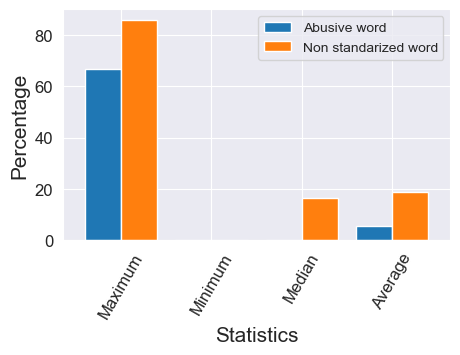

In [193]:
plot = df_abusive_nonbaku.plot(x="Segmen", y=["Abusive word", "Non standarized word"], kind="bar", figsize=(5, 3),linewidth=1, width=0.8, align='center')
plt.xlabel('Statistics', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12)
plt.show()